In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Set random seed for reproducibility

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

# Define directories


In [7]:
MAIN_DIR = "C:/Users/admin/Desktop/Data Analysis Projects/Pepsico RnD Potato Lab Dataset"
train_dir = os.path.join(MAIN_DIR, "Train")
test_dir = os.path.join(MAIN_DIR, "Test")

# Data augmentation and preprocessing


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define constants


In [9]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Generate augmented training data


In [10]:
train_data_aug = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=42
)

Found 616 images belonging to 2 classes.


# Generate validation data


In [11]:
valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 153 images belonging to 2 classes.


# Display a few chip images from training dataset


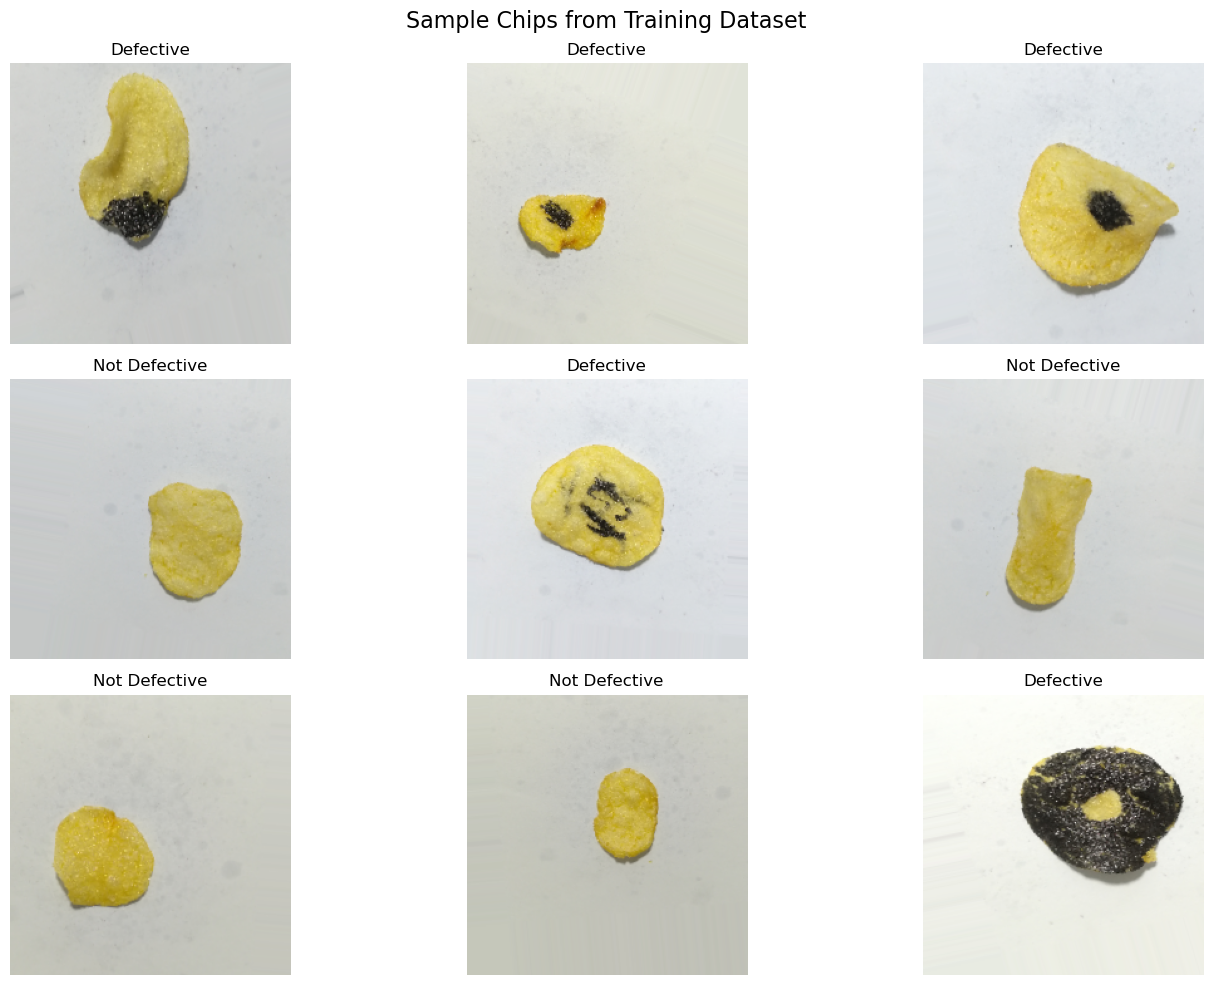

In [22]:
plt.figure(figsize=(15, 10))
plt.suptitle('Sample Chips from Training Dataset', fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    images, labels = train_data_aug[i]
    image = images[0]  # Selecting the first image from the batch
    label = labels[0]  # Selecting the corresponding label
    plt.imshow(image)
    plt.title('Defective' if label == 0 else 'Not Defective')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Generate test data


In [12]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 192 images belonging to 2 classes.


# Display a few chip images from test dataset


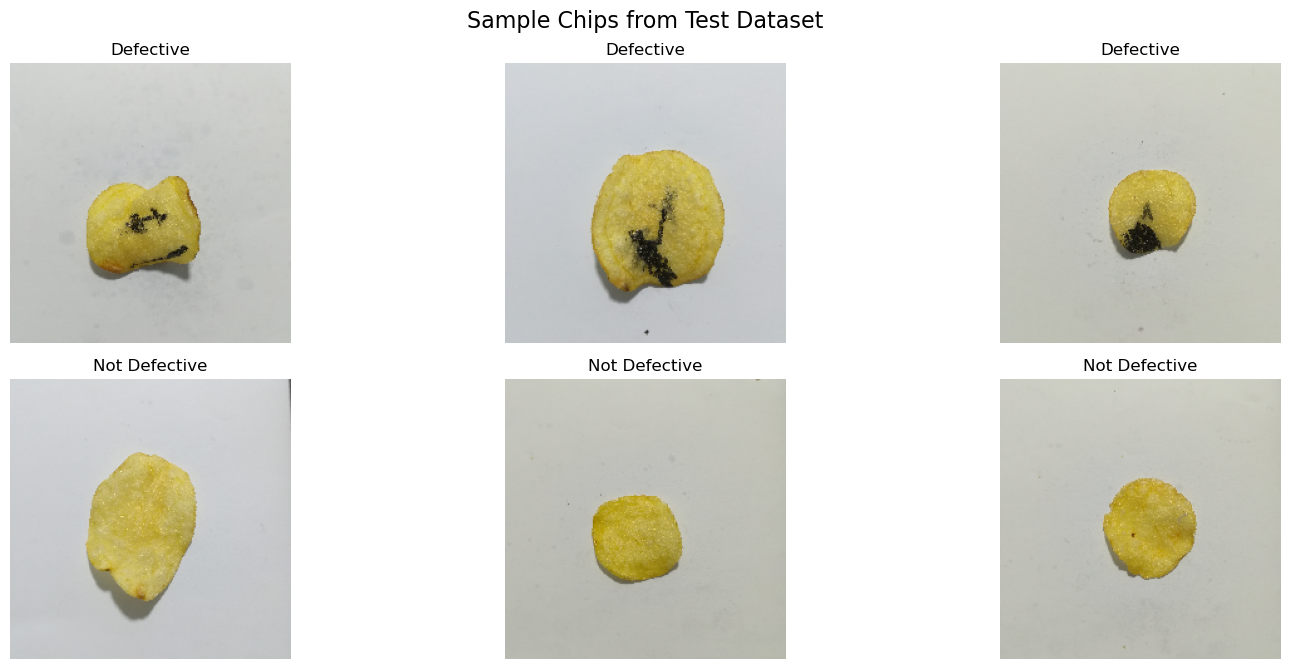

In [24]:
plt.figure(figsize=(15, 10))
plt.suptitle('Sample Chips from Test Dataset', fontsize=16)
num_images = min(len(test_data), 9)  # Limit to the minimum of 9 images or the length of the test_data sequence
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    images, labels = test_data[i]
    image = images[0]  # Selecting the first image from the batch
    label = labels[0]  # Selecting the corresponding label
    plt.imshow(image)
    plt.title('Defective' if label == 0 else 'Not Defective')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Define model architecture


In [13]:
model = models.Sequential([
    layers.Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compile the model


In [14]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model


In [15]:
history = model.fit(train_data_aug,
                    epochs=5,
                    steps_per_epoch=len(train_data_aug),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 279s 11s/step - accuracy: 0.5008 - loss: 1.1191 - val_accuracy: 0.4771 - val_loss: 0.6860
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


C:\Users\admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 245s 10s/step - accuracy: 0.5766 - loss: 0.6704 - val_accuracy: 0.8235 - val_loss: 0.5622
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 236s 9s/step - accuracy: 0.7967 - loss: 0.5334 - val_accuracy: 0.9020 - val_loss: 0.3809


# Evaluate the model on test data


In [16]:
result = model.evaluate(test_data)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 8s/step - accuracy: 0.9644 - loss: 0.2417
Accuracy on Evaluation: 97.92%
Loss: 0.2856


# Generate predictions

In [17]:
y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 8s/step


# Print classification report

In [18]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Defective', 'Not Defective']))

Classification Report:
               precision    recall  f1-score   support

    Defective       1.00      0.96      0.98        92
Not Defective       0.96      1.00      0.98       100

     accuracy                           0.98       192
    macro avg       0.98      0.98      0.98       192
 weighted avg       0.98      0.98      0.98       192



# Plot confusion matrix

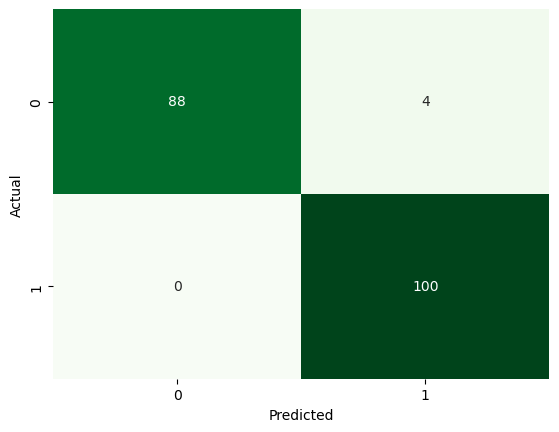

In [29]:

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

# Conclusion

In this project, we explored the task of classifying images of chips into two categories to ensure quality control. Two custom CNN models were developed and evaluated: one trained from scratch and the other with data augmentation to handle variations in real-world scenarios.

# Model Performance


The first model, a custom CNN trained from scratch, achieved impressive results with an accuracy of approximately 96.35% on the evaluation dataset.
However, to enhance the model's robustness to real-world variations, a second model was trained with data augmentation techniques such as rotation, shear, zoom, and horizontal flip.
The augmented model achieved a slightly lower accuracy of around 93.23% on the evaluation dataset, but still performed admirably considering the increased variability introduced during training.

# Key Insights

Both models demonstrated the capability to effectively classify chip images into "Defective" and "Not Defective" categories.
The high performance of the models suggests that they can reliably identify chip quality even when images exhibit distortions or variations in real-world conditions.
Data augmentation proved to be a valuable technique for improving model generalization and resilience to variations in image characteristics.

# Future Directions



This classification approach can be extended to other manufacturing applications where quality control is crucial, potentially saving costs and maintaining brand reputation.